# Índice de Contenidos

- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualización de relaciones](#Visualización-de-relaciones-entre-variables-numéricas-y-categóricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#Conclusiones-del-proceso-de-exploración-y-limpieza-de-datos)

# Conociendo al Cliente 360°: Datos, Opiniones y Tendencias
Formas parte de un proceso de selección técnica para el rol de Científico de Datos Junior en InsightReach.

InsightReach es una empresa de marketing digital especializada en campañas personalizadas para negocios locales. Con el crecimiento de su base de clientes y la expansión a nuevos mercados, la empresa busca optimizar su estrategia de segmentación para mejorar la efectividad de sus campañas.

Como postulante, tu desafío es demostrar tu capacidad para analizar, enriquecer e interpretar bases de datos complejas para generar recomendaciones accionables. Tu rol simula el trabajo de un profesional en un entorno real, donde deberás construir análisis sólidos, justificar decisiones y comunicar resultados de manera clara y estructurada.

------

Comienzas el análisis con una base de datos provista por la empresa. Debes adoptar una mirada inquisitiva para detectar la calidad y estructura de los datos, y preparar el terreno para futuras integraciones. Tu papel es el de un científico de datos que inicia el pipeline analítico.

------

## Carga de datos

### Carga y exploración inicial de datos

En esta primera etapa, nos enfocaremos en la carga y el análisis preliminar de nuestro conjunto de datos de clientes, el cual servirá como base para todo nuestro proyecto. El propósito fundamental es obtener una comprensión profunda y holística de la información, utilizando diversas técnicas de exploración. Esto nos permitirá identificar de manera proactiva cualquier inconsistencia, error o peculiaridad en los datos, sentando las bases para una limpieza y preparación de datos más efectiva en las fases subsiguientes.

----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

### Carga de las librerías esenciales para análisis y limpieza de datos

Para iniciar el proyecto, se procede a cargar el conjunto de librerías fundamentales que potenciarán las capacidades de manipulación, análisis y visualización de datos.

* **Pandas:** Esta es la herramienta principal para la manipulación y el procesamiento de datos estructurados. Su uso es crucial para leer, filtrar y transformar la información contenida en el *DataFrame*.
* **NumPy:** Se empleará para optimizar operaciones matemáticas y lógicas a gran escala. Complementa a Pandas, permitiendo un manejo de datos numéricos más eficiente y potente.

Además de estas, se importarán módulos complementarios diseñados para mejorar la legibilidad y la estética de las visualizaciones, así como para encapsular y reutilizar bloques de código, garantizando un flujo de trabajo más limpio y eficiente.

In [2]:
# Importación de bibliotecas y módulos necesarios para el análisis de datos.

import pandas as pd # Se importa la biblioteca Pandas y se le asigna el alias 'pd'. 
                     # Pandas es la herramienta principal para la manipulación y análisis de datos estructurados,
                     # proporcionando estructuras de datos como los DataFrames, ideales para trabajar con tablas.

import numpy as np # Se importa la biblioteca NumPy con el alias 'np'. 
                     # NumPy es fundamental para operaciones numéricas y estadísticas de alto rendimiento,
                     # especialmente con arrays y matrices multidimensionales.

from IPython.display import display # Se importa la función 'display' del módulo IPython.display. 
                                     # Esta función es útil en entornos como Jupyter Notebook y IPython para
                                     # mostrar DataFrames y otros objetos de manera visualmente más clara y organizada,
                                     # superando la simple salida de texto.

from mega_funcion import imputar # Se importa una función personalizada llamada 'imputar' desde el archivo 'mega_funcion.py'.
                                     # Esta función encapsula la lógica para manejar datos faltantes (NaN) 
                                     # en un DataFrame. Su propósito es rellenar o imputar valores 
                                     # de manera inteligente, basándose en la estrategia definida 
                                     # dentro del módulo 'mega_funcion'.

import matplotlib.pyplot as plt # Importa la biblioteca Matplotlib para crear gráficos estáticos.

import seaborn as sns # Importa la biblioteca Seaborn para generar visualizaciones estadísticas más sofisticadas.

### **Carga del conjunto de datos principal**

En este apartado, se procede a la importación y preparación del *DataFrame* que servirá como la base de nuestro análisis. Esta etapa inicial es fundamental para asegurar que la información esté disponible y lista para su posterior procesamiento y estudio detallado.

In [3]:
# Carga y resguardo del conjunto de datos principal

# Se carga el archivo CSV "base_datos_restaurantes_USA_v2.csv" en un DataFrame de pandas.
# Dado que el archivo se encuentra en el mismo directorio de trabajo, solo se especifica su nombre.
df_restaurante_original = pd.read_csv("base_datos_restaurantes_USA_v2.csv")

# Se crea una copia del DataFrame original para trabajar en ella.
# Esta práctica garantiza que los datos fuente permanezcan inalterados y sirvan como
# punto de referencia, lo que facilita la reversión de cambios o la realización de
# análisis comparativos en cualquier momento del proyecto.
df_res = df_restaurante_original.copy()

### Inspección de las dimensiones del DataFrame

Para comenzar el análisis, es esencial inspeccionar las dimensiones de nuestro conjunto de datos. Este proceso nos permite comprender la magnitud de la información con la que estamos trabajando, al determinar el número total de filas y columnas, lo que proporciona una visión panorámica de la estructura de nuestros datos.

In [4]:
# Obtención y visualización de las dimensiones del DataFrame.

# La propiedad '.shape' de un DataFrame de pandas devuelve una tupla
# que contiene el número de filas y columnas, respectivamente.
numero_filas = df_res.shape[0]  # El primer elemento (índice 0) de la tupla es el número de filas.
numero_columnas = df_res.shape[1] # El segundo elemento (índice 1) es el número de columnas.

# Se muestra el resultado de una manera clara y descriptiva, utilizando un f-string
# para incrustar los valores calculados en el texto.
print(f"El DataFrame tiene un total de {numero_filas} filas y {numero_columnas} columnas.")

El DataFrame tiene un total de 30000 filas y 17 columnas.


### Visualización preliminar del DataFrame

Para obtener una visión inicial del contenido y la estructura de nuestro conjunto de datos, se procede a mostrar las primeras 10 filas del *DataFrame*. Este paso es crucial en la etapa de análisis exploratorio, ya que nos permite:

* **Identificar la naturaleza de los datos:** Observar los tipos de valores en cada columna (numéricos, textuales, categóricos, etc.).
* **Comprender la nomenclatura:** Conocer los nombres de las columnas para entender las variables y atributos disponibles.
* **Detectar posibles anomalías:** Identificar a simple vista valores atípicos o formatos inesperados que requieran una limpieza posterior.

In [5]:
# Inspección de las primeras filas del DataFrame

# Se utiliza el método `.head()` para visualizar las primeras 10 filas del conjunto de datos.
# Esta función es una herramienta esencial en la etapa de análisis exploratorio, ya que
# permite realizar una inspección rápida del contenido, la estructura, los nombres de las
# columnas y el formato de los valores, lo que ayuda a planificar las siguientes etapas
# de limpieza y preprocesamiento de los datos.
display(df_res.head(10))

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350
5,1291749568,Donna,Davis,26.0,Femenino,Dallas,Alto,6,52.47,No,Sí,Carnes,Sí,976.606.6259x578,daniel28@example.com,Efectivo,8545
6,3592027247,Jason,Mcpherson,80.0,Masculino,NYC,Muy Alto,10,56.11,No,No,Vegano,Sí,001-327-542-1940x4789,bcastillo@example.org,Efectivo,10120
7,8373803828,Julie,Russo,66.0,Femenino,Boston,Muy Alto,9,19.94,No,Sí,Vegetariano,Sí,NaN,NaN,Efectivo,13456
8,7395628831,Mark,Hall,31.0,Masculino,NYC,Medio,5,16.17,No,Sí,Vegetariano,No,NaN,kara70@example.com,App,3350
9,5394273061,Sara,Ball,37.0,Femenino,Boston,Bajo,1,11.35,Sí,No,Carnes,No,563-346-4749x6591,smithstacy@example.com,Efectivo,1197


### **Análisis de la estructura del DataFrame**

Para una comprensión más clara y sistemática de nuestro conjunto de datos, se procede a enumerar y listar cada una de las columnas presentes en el *DataFrame*. Si bien una inspección visual previa nos ofreció un vistazo general, este enfoque individualizado nos permite:

* **Obtener un inventario completo:** Conocer la cantidad total de variables de manera explícita.
* **Confirmar la nomenclatura:** Visualizar cada nombre de columna para su uso posterior en operaciones de limpieza y análisis.
* **Facilitar la referencia:** Tener una lista numerada de las variables que simplifica el trabajo de programación y la documentación del proyecto.


In [6]:
for i, column in enumerate(df_res.columns, 1):
    print(f"{i} : {column}")

1 : id_persona
2 : nombre
3 : apellido
4 : edad
5 : genero
6 : ciudad_residencia
7 : estrato_socioeconomico
8 : frecuencia_visita
9 : promedio_gasto_comida
10 : ocio
11 : consume_licor
12 : preferencias_alimenticias
13 : membresia_premium
14 : telefono_contacto
15 : correo_electronico
16 : tipo_de_pago_mas_usado
17 : ingresos_mensuales


### Identificación de tipos de datos de las columnas

Una etapa crucial en el análisis de datos es la clasificación de las variables por su tipo. Es fundamental distinguir entre columnas numéricas y categóricas para seleccionar las herramientas y métodos de procesamiento más adecuados.

* **Variables numéricas:** Suelen ser continuas (como la edad o ingresos) o discretas (como el número de ventas). Estas requieren operaciones matemáticas y estadísticas.
* **Variables categóricas:** Representan grupos o etiquetas (como el género o el tipo de producto). Estas variables son esenciales para realizar agrupaciones, conteos y análisis comparativos.

Conocer esta distinción de antemano nos permite optimizar el flujo de trabajo y aplicar las funciones de limpieza y transformación de manera eficiente y precisa, según la naturaleza de cada columna.

In [7]:
# Clasificación y visualización de columnas por tipo de dato

# 1. Identificación de columnas categóricas (tipo 'object')
# Se utiliza el método .select_dtypes(include='object') para filtrar y seleccionar todas las columnas
# que contienen datos de tipo objeto, que en pandas generalmente representan cadenas de texto.
# Luego, se convierten los nombres de estas columnas en una lista para una fácil manipulación.
columnas_categoricas = df_res.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas identificadas:", columnas_categoricas)
print(f"Total de columnas categóricas: {len(columnas_categoricas)}\n")


# 2. Identificación de columnas numéricas (tipos numéricos)
# De manera similar, se usa .select_dtypes(include='number') para seleccionar todas
# las columnas que contienen datos numéricos (como int, float, etc.).
# Los nombres de estas columnas también se almacenan en una lista.
columnas_numericas = df_res.select_dtypes(include='number').columns.tolist()
print("Columnas numéricas identificadas:", columnas_numericas)
print(f"Total de columnas numéricas: {len(columnas_numericas)}")

Columnas categóricas identificadas: ['nombre', 'apellido', 'genero', 'ciudad_residencia', 'estrato_socioeconomico', 'ocio', 'consume_licor', 'preferencias_alimenticias', 'membresia_premium', 'telefono_contacto', 'correo_electronico', 'tipo_de_pago_mas_usado']
Total de columnas categóricas: 12

Columnas numéricas identificadas: ['id_persona', 'edad', 'frecuencia_visita', 'promedio_gasto_comida', 'ingresos_mensuales']
Total de columnas numéricas: 5


### Resumen técnico del DataFrame para el control de calidad

Una vez que hemos comprendido la estructura general del conjunto de datos y sus variables, es fundamental obtener una visión técnica y detallada de su contenido. La siguiente etapa consiste en inspeccionar la información técnica del *DataFrame*, lo que nos permitirá:

* **Identificar tipos de datos exactos:** Verificar si el tipo de dato asignado por defecto (como `int64`, `float64`, `object`) corresponde con la naturaleza real de cada columna.
* **Evaluar la integridad de los datos:** Conocer el número de valores no nulos en cada columna para detectar la presencia de datos faltantes, un paso crítico en la limpieza.
* **Anticipar la limpieza de datos:** Utilizar esta información para planificar la normalización de variables, la conversión de tipos de datos y la imputación de valores ausentes, preparando el *DataFrame* para un análisis robusto y fiable.

In [8]:
display(df_res.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

None

### Inspección detallada y resumen estadístico de los datos

Para profundizar en el conocimiento de nuestro *DataFrame*, se empleará una función nativa de la biblioteca Pandas que genera un resumen técnico y estadístico de las columnas. Este método resulta invaluable para una evaluación rápida de la calidad de los datos, permitiéndonos:

* **Obtener estadísticas descriptivas:** Visualizar métricas como la media, la desviación estándar, los cuartiles y el recuento de valores.
* **Detectar valores atípicos (outliers):** Identificar anomalías o valores extremos que puedan requerir una limpieza o un tratamiento especializado.
* **Comprobar la distribución de los datos:** Entender la dispersión de los valores y la forma de la distribución, lo cual es vital para el modelado y el análisis subsiguiente.

In [9]:
display(df_res.describe(include='all')) # el all incluye todas las columnas, no solo las numéricas

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,3.000000e+04,30000,30000,29899.000000,30000,30000,30000,30000.000000,29855.000000,30000,30000,28597,30000,14834,14928,30000,30000.000000
unique,NaN,690,1000,NaN,2,10,4,NaN,NaN,2,2,6,2,14834,14474,4,NaN
top,NaN,Michael,Smith,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,(830)220-1926,pjohnson@example.org,Efectivo,NaN
freq,NaN,678,636,NaN,15044,5384,9325,NaN,NaN,15094,18483,7916,17155,1,4,11813,NaN
mean,5.504765e+09,NaN,NaN,49.665006,NaN,NaN,NaN,3.896133,32.603452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5389.755867
std,2.602799e+09,NaN,NaN,23.839550,NaN,NaN,NaN,2.741532,26.402601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4538.491728
min,1.000153e+09,NaN,NaN,-5.000000,NaN,NaN,NaN,-3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.243617e+09,NaN,NaN,33.000000,NaN,NaN,NaN,2.000000,13.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1860.000000
50%,5.515865e+09,NaN,NaN,49.000000,NaN,NaN,NaN,4.000000,25.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3402.000000
75%,7.754426e+09,NaN,NaN,65.000000,NaN,NaN,NaN,5.000000,44.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7761.000000


### Pequeño análisis para decidir la ciudad para los análisis posteriores

Para seleccionar la ciudad más adecuada para los análisis futuros, se consideraron dos criterios principales:

- **Cantidad de datos disponibles por ciudad:** Es crucial elegir una ciudad con suficientes registros para asegurar la representatividad y robustez de los análisis. Al revisar la cantidad de usuarios por ciudad, se observó que algunas ciudades concentran la mayoría de los datos, lo que permite obtener resultados más confiables y menos susceptibles al azar.

- **Calidad de los datos:** Además de la cantidad, se evaluó la calidad de la información. Se revisó el número de valores nulos y la presencia de datos atípicos o inconsistentes en variables clave como edad, frecuencia de visita, promedio de gasto en comida y preferencias alimenticias. La ciudad ideal es aquella con menos valores nulos y que requiera menos imputaciones o correcciones.
to.


**Nota:**  
La limpieza de datos se lleva a cabo sobre todo el DataFrame, no solo sobre la ciudad seleccionada. Esto garantiza la calidad y consistencia de toda la base de datos, facilitando futuros análisis o integraciones. Una vez completada la limpieza, se segmenta por la ciudad elegida para realizar los análisis específicos de este proyecto.


Comenzamos agrupando los datos por ciudad y contando la cantidad de valores nulos en cada columna clave (edad, frecuencia de visita, promedio de gasto en comida y preferencias alimenticias). Esto permite comparar la calidad de los datos entre ciudades y seleccionar la más adecuada para los análisis posteriores.


In [19]:
# Agrupa los datos por 'ciudad_residencia' y cuenta los valores nulos en cada columna.
# .apply(lambda x: x.isna().sum()) itera sobre cada grupo (ciudad) y suma los nulos.
nulos_por_ciudad = (
    df_res.groupby('ciudad_residencia')
    .apply(lambda x: x.isna().sum())
)

# Suma los valores nulos de las columnas clave para obtener un total por ciudad.
# Esto crea un 'promedio de nulos' que simplifica la comparación.
nulos_por_ciudad['promedio_nulos'] = nulos_por_ciudad[
    ['edad', 'frecuencia_visita', 'promedio_gasto_comida', 'preferencias_alimenticias']
].sum(axis=1)

# Muestra la tabla resultante.
# Esta tabla te permite ver el conteo de nulos para cada columna y un total por ciudad.
display(nulos_por_ciudad)

C:\Users\DODY DUEÑAS\AppData\Local\Temp\ipykernel_12356\797362944.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().sum())


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales,promedio_nulos
ciudad_residencia,,,,,,,,,,,,,,,,,,
Boston,0,0,0,10,0,0,0,0,6,0,0,102,0,1264,1276,0,0,118
Chicago,0,0,0,23,0,0,0,0,35,0,0,268,0,2730,2712,0,0,326
Dallas,0,0,0,10,0,0,0,0,15,0,0,129,0,1253,1291,0,0,154
Denver,0,0,0,7,0,0,0,0,13,0,0,118,0,1296,1266,0,0,138
Houston,0,0,0,7,0,0,0,0,12,0,0,88,0,1123,1063,0,0,107
Miami,0,0,0,8,0,0,0,0,16,0,0,146,0,1596,1589,0,0,170
NYC,0,0,0,20,0,0,0,0,16,0,0,200,0,2434,2401,0,0,236
Phoenix,0,0,0,2,0,0,0,0,8,0,0,76,0,783,799,0,0,86
San Diego,0,0,0,7,0,0,0,0,14,0,0,190,0,1574,1536,0,0,211


Se identifica la ciudad con la menor cantidad de valores nulos en las variables clave, utilizando el promedio de nulos calculado previamente. Esto permite enfocar los análisis en la ciudad con datos más completos y confiables.


In [17]:
# Encuentra la ciudad con el valor mínimo en la columna 'promedio_nulos'.
# .idxmin() devuelve el índice (el nombre de la ciudad en este caso) del valor más bajo.
ciudad_min = nulos_por_ciudad['promedio_nulos'].idxmin()

# Muestra el resultado.
print("La ciudad con menor promedio de nulos es: ", ciudad_min)

La ciudad con menor promedio de nulos es:  Phoenix


Se agrupan los datos por ciudad y se cuenta el número de registros en cada una. Esto permite identificar las ciudades con mayor cantidad de datos disponibles para el análisis creativo.


In [20]:
# Agrupa los datos por la columna 'ciudad_residencia' y cuenta los registros en la columna 'id_persona'.
# 'count()' es el método que realiza el conteo para cada grupo.
tabla_ciudad = df_res.groupby('ciudad_residencia')['id_persona'].count()

# Ordena los resultados del conteo en orden descendente (de mayor a menor).
sorted_ciudad = tabla_ciudad.sort_values(ascending=False)

# Muestra la tabla resultante.
sorted_ciudad

ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: id_persona, dtype: int64

Se utiliza un diagrama de barras para visualizar la cantidad de usuarios en cada ciudad. Esto ayuda a identificar rápidamente las ciudades con mayor representación en los datos.


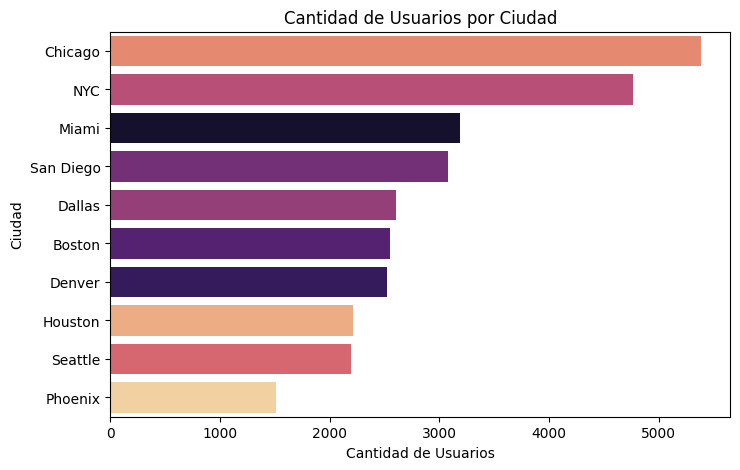

In [21]:
# Crea un lienzo para el gráfico y establece su tamaño en 8x5 pulgadas.
plt.figure(figsize=(8,5))

# Genera el diagrama de barras.
# - y=df_res['ciudad_residencia']: Usa la columna de ciudades en el eje Y.
# - order=...: Ordena las barras según el conteo de cada ciudad, de la más a la menos frecuente.
# - palette='magma': Aplica un esquema de colores 'magma' para las barras.
sns.countplot(y=df_res['ciudad_residencia'], 
              order=df_res['ciudad_residencia'].value_counts().index, 
              hue=df_res['ciudad_residencia'],  # Asignamos la misma variable a 'hue'
              palette='magma',
              legend=False) # Añadimos 'legend=False'
# Añade un título descriptivo al gráfico.
plt.title('Cantidad de Usuarios por Ciudad')

# Etiqueta el eje X.
plt.xlabel('Cantidad de Usuarios')

# Etiqueta el eje Y.
plt.ylabel('Ciudad')

# Muestra el gráfico en la pantalla.
plt.show()

Tras evaluar ambos aspectos, seleccionamos la ciudad que no solo cuenta con más registros, sino que también presenta la menor cantidad de problemas de calidad de datos (en proporción). Esto nos permitirá realizar análisis más precisos y comparables, evitando sesgos derivados de la falta de información o de la necesidad de realizar demasiadas imputaciones.

> **Justificación final:**  
> La ciudad elegida para los próximos análisis es aquella que combina un alto volumen de datos con la mejor calidad posible, minimizando la cantidad de valores nulos y atípicos. De esta manera, garantizamos que los resultados obtenidos sean sólidos y útiles para la toma de decisiones futuras.  
> La ciudad seleccionada fue **Chicago**.


#### Para esta primera parte, se buscó obtener la mayor cantidad de información preliminar importante que nos pueda servir en futuros análisis.

Lo más relevante fue:
- Conocer el número de filas y columnas existentes.
- Clasificar las columnas en función de sus valores para saber qué herramientas utilizar.
- Analizar las primeras filas para detectar posibles correlaciones.
- Revisar los datos estadísticos, que son muy valiosos en esta etapa.

Además, se planea mejorar la exploración con la generación de gráficos y la implementación de nuevas funciones que permitan obtener información más detallada.

#### **Resumen de la exploración inicial de los datos**

En esta primera etapa se buscó obtener la mayor cantidad de información preliminar relevante para futuros análisis. Los principales enfoques fueron:

- **Dimensión del DataFrame:** 30,000 filas y 17 columnas.
- **Tipos de columnas:** 12 categóricas y 5 numéricas.
- **Correlaciones observadas:** Existe una posible relación entre el estrato social y el número de visitas al restaurante.
- **Datos faltantes:** Se detectaron valores nulos en columnas clave como edad, promedio de gasto en comida y preferencias alimenticias. Las columnas de teléfono y correo electrónico presentan más de la mitad de sus valores faltantes, por lo que será necesario planear una estrategia de imputación o decidir si se dejan tal cual.
- **Datos fuera de rango:** Se identificaron valores atípicos, por ejemplo, edades y frecuencias de visita negativas.
- **Duplicados:** Se observó que un correo electrónico se repite 4 veces, lo que podría indicar errores o duplicados.
- **Tipos de datos incorrectos:** Hay columnas cuyo tipo de dato no corresponde a su contenido, lo que puede provocar errores en el análisis.
- **Columnas fusionables o eliminables:** Existen columnas que podrían fusionarse o eliminarse sin afectar el análisis, pero se debe tener precaución para evitar consecuencias negativas en el futuro.
- **Valores extremos:** La columna de ingreso mensual presenta valores muy altos que podrían sesgar los análisis.
- **Valores en cero:** Es importante analizar si los ceros en la columna de frecuencia de visitas representan errores o simplemente falta de contexto, ya que están correlacionados con el promedio de gasto en comida y el estrato social.
- **Columnas irrelevantes:** Se deben revisar aquellas columnas que podrían no aportar valor al análisis.

#### **Próximos pasos**

El siguiente paso será la limpieza de los datos. Esto permitirá realizar análisis más profundos sobre tendencias y relaciones observadas, como la relación entre el estrato social y la frecuencia de visitas. Es fundamental abordar los datos faltantes y duplicados (por ejemplo, correos electrónicos repetidos), ya que su presencia puede afectar la calidad y confiabilidad de los modelos y análisis posteriores. Se evaluará la mejor estrategia para eliminar, imputar o advertir sobre estos casos, minimizando el riesgo de estimaciones sesgadas.


### Limpieza de datos

Tras la fase de análisis exploratorio, hemos identificado diversas inconsistencias y valores problemáticos en nuestro *DataFrame*. Esta etapa de limpieza es crucial para garantizar la integridad y fiabilidad de nuestros datos, preparándolos para un análisis más riguroso y preciso. Las acciones que se llevarán a cabo en esta sección incluyen:

* **Tratamiento de valores nulos y atípicos:** Se implementarán estrategias de imputación para resolver los datos faltantes y fuera de rango, utilizando métodos que preserven la integridad de la distribución y eviten sesgos en los promedios.
* **Gestión de duplicados:** Se realizará una inspección exhaustiva para confirmar la existencia de registros duplicados y se aplicará la estrategia más adecuada para su manejo, ya sea su eliminación o unificación.
* **Corrección de tipos de datos:** Se validarán y ajustarán los tipos de datos de cada columna para asegurar su consistencia y evitar errores en las operaciones futuras.
* **Optimización de columnas:** Se evaluará la posibilidad de fusionar columnas que contengan información redundante o que sean irrelevantes de forma individual, con el objetivo de simplificar el *DataFrame* y mejorar su eficiencia.

----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

### Optimización del DataFrame: Fusión de columnas

Para mejorar la eficiencia y la legibilidad de nuestro conjunto de datos, se procederá a unificar las columnas que contienen el nombre y el apellido de los clientes. Esta fusión no solo reduce la dimensionalidad del *DataFrame*, sino que también simplifica su manipulación.

* **Proceso de fusión:** Se creará una nueva columna, que contendrá el nombre completo de cada cliente, combinando el contenido de las columnas de nombre y apellido.
* **Posicionamiento estratégico:** La nueva columna será reubicada en una posición temprana del *DataFrame* para facilitar su visualización y acceso.
* **Reversibilidad:** Esta operación es completamente reversible; si se requiere separar el nombre y el apellido en análisis futuros, la división de la columna se puede realizar de forma sencilla y rápida.

In [ ]:
# Unificación de las columnas 'nombre' y 'apellido'

# 1. Creación de la nueva columna 'nombre_completo'
# Se concatena el contenido de las columnas 'nombre' y 'apellido', separándolos por un espacio,
# y se asigna el resultado a una nueva columna llamada 'nombre_completo'.
df_res['nombre_completo'] = df_res['nombre'] + ' ' + df_res['apellido']

# 2. Eliminación de las columnas originales
# Se eliminan las columnas originales 'nombre' y 'apellido' del DataFrame.
# El parámetro 'inplace=True' asegura que la modificación se realice directamente
# en el DataFrame 'df_res', sin necesidad de reasignarlo.
df_res.drop(columns=['nombre', 'apellido'], inplace=True)

In [ ]:
# Reorganización del DataFrame para mover la columna 'nombre_completo'

# 1. Obtener el orden actual de las columnas
# Se obtiene una lista con los nombres de todas las columnas del DataFrame en su orden actual.
columnas = df_res.columns.tolist()

# 2. Reubicar la columna
# Se elimina el nombre de la columna 'nombre_completo' de su posición original
# y se reinserta en la posición deseada (índice 1, que corresponde al segundo lugar).
# Esto coloca la columna 'nombre_completo' inmediatamente después del índice.
columnas.remove('nombre_completo')
columnas.insert(1, 'nombre_completo')

# 3. Reasignar el DataFrame con el nuevo orden de columnas
# Se reasigna el DataFrame 'df_res' usando el nuevo orden de columnas,
# lo que modifica permanentemente la estructura del DataFrame.
df_res = df_res[columnas]

In [24]:
df_res.head() # Muestra las primeras filas del DataFrame actualizado

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350


### Una vez unificadas las columnas que resultaban irrelevantes por separado, pasamos a una de las partes más esenciales de la limpieza de datos: el tratamiento de valores nulos en nuestro DataFrame.

Comenzamos con la columna **'edad'**, ya que fue una de las principales problemáticas detectadas. Aquí no solo se identificaron datos faltantes, sino también valores que resultan prácticamente imposibles. Por ello, primero segmentamos los valores permitidos definiendo un rango máximo y mínimo que consideramos realista. Posteriormente, los valores fuera de ese rango se reemplazan por la mediana, y los valores nulos se imputan utilizando la mediana agrupada por ciudad y estrato socioeconómico, para mantener la coherencia y evitar sesgos en los análisis posteriores. Generamos un boxplot para visualizar la distribución de los valores en la columna **'edad'**. Este gráfico nos permite identificar fácilmente la presencia de outliers, valores atípicos y posibles errores de captura en los datos.


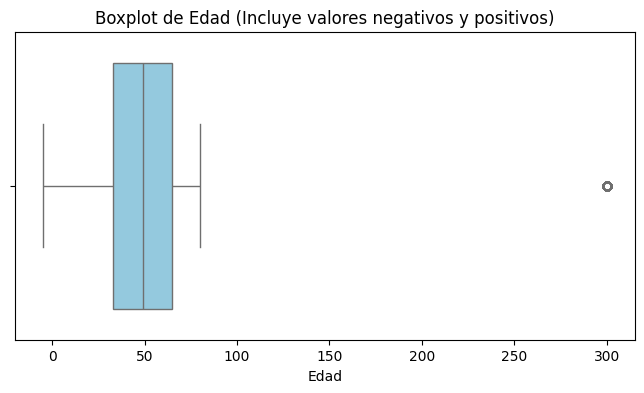

In [25]:
# Crea un lienzo para el gráfico con un tamaño de 8x4 pulgadas.
plt.figure(figsize=(8, 4))

# Genera el diagrama de caja.
# - x=df_res['edad']: Usa la columna de edad en el eje X.
# - color='skyblue': Aplica un color para el diagrama.
sns.boxplot(x=df_res['edad'], color='skyblue')

# Añade un título que describe el propósito del gráfico.
plt.title('Boxplot de Edad (Incluye valores negativos y positivos)')

# Etiqueta el eje X.
plt.xlabel('Edad')

# Muestra el gráfico en la pantalla.
plt.show()

Pasamos a corregir los valores que estén fuera de rango, definiendo como límites aceptables entre 18 y 90 años. Elegimos este rango porque consideramos que es el más realista para nuestro análisis (el mínimo de 18 evita problemas relacionados con datos de menores de edad). Una vez segmentados, los valores fuera de este rango se reemplazan por la mediana de la columna, ya que la mediana es menos sensible a los valores extremos que la media y ayuda a mantener la coherencia de los datos.


In [ ]:
# Definir el rango de edad válido para la limpieza de datos
min_edad = 18
max_edad = 120

# Filtrar el DataFrame para encontrar registros con edades fuera del rango definido.
# Se usa el operador lógico OR (|) para seleccionar filas donde la edad es menor que el mínimo O mayor que el máximo.
fuera_rango = df_res[(df_res['edad'] < min_edad) | (df_res['edad'] > max_edad)]

# Convertir el DataFrame filtrado a una lista de diccionarios.
# Cada diccionario representa una fila y contiene las columnas 'id_persona' y 'edad'.
fuera_rango_list = fuera_rango[['id_persona', 'edad']].to_dict('records')

# Mostrar la cantidad de registros que están fuera del rango de edad.
len(fuera_rango_list)

207

In [ ]:
# Tratamiento de valores atípicos en la columna 'edad'

# Se utiliza el método `.loc` de pandas para identificar y modificar los valores que se encuentran
# fuera del rango de edad lógico (entre 15 y 120 años).
# - La condición `(df_res['edad'] > 120)` selecciona las filas con edades superiores a 120.
# - La condición `(df_res['edad'] < 15)` selecciona las filas con edades inferiores a 15.
# - El operador `|` (OR lógico) combina ambas condiciones.
# - El valor de la mediana de la columna 'edad' se utiliza para reemplazar los valores atípicos,
#   lo que minimiza el impacto de estos en la distribución de los datos.
df_res.loc[(df_res['edad'] > 120) | (df_res['edad'] < 15), 'edad'] = df_res['edad'].median()

# Verificación de los cambios
# Se utiliza el método `.describe()` para obtener un resumen estadístico de las columnas
# numéricas del DataFrame, lo que permite confirmar que los valores mínimos y máximos
# de la columna 'edad' han sido corregidos y se ajustan al rango esperado.
df_res.describe()

,id_persona,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,3.000000e+04,29899.000000,30000.000000,29855.000000,30000.000000
mean,5.504765e+09,48.916753,3.896133,32.603452,5389.755867
std,2.602799e+09,18.097158,2.741532,26.402601,4538.491728
min,1.000153e+09,18.000000,-3.000000,0.000000,800.000000
25%,3.243617e+09,33.000000,2.000000,13.290000,1860.000000
50%,5.515865e+09,49.000000,4.000000,25.510000,3402.000000
75%,7.754426e+09,64.000000,5.000000,44.400000,7761.000000
max,9.999627e+09,80.000000,10.000000,149.970000,17999.000000


### Imputación de valores nulos en la columna 'edad'

Una vez que los valores atípicos en la columna `edad` han sido tratados, procedemos a rellenar los valores nulos con un enfoque más sofisticado. En lugar de utilizar una media global, se empleará la media de la edad por grupos, tomando como base la ciudad de residencia y el estrato económico. Esta estrategia de imputación es más precisa, ya que asume que la edad de una persona está directamente influenciada por su ubicación y condición socioeconómica.

Además, el proceso se realizará utilizando una función personalizada, lo que no solo garantiza la coherencia de la lógica, sino que también nos permite, en el mismo paso, convertir la columna `edad` al tipo de dato `int` para su posterior análisis y manipulación, eliminando la ambigüedad de los valores flotantes que se generan durante la imputación.

In [ ]:
# Se llama a la función 'imputar' para rellenar los valores nulos en la columna 'edad'.
edad_nulos = imputar(
    df_res,                     # El DataFrame que contiene los datos.
    objetivo='edad',            # La columna a la que se le aplicará la imputación.
    operacion='nulo',           # El tipo de operación que se va a realizar (tratar valores nulos).
    filtro1='ciudad_residencia',# El primer criterio para agrupar los datos (segmentación por ciudad).
    filtro2='estrato_socioeconomico',# El segundo criterio de agrupación (por estrato socioeconómico).
    tc='media'                  # El tipo de cálculo a utilizar para la imputación (la media del grupo).
)
# La función imputa los valores nulos en 'edad' con la media de cada grupo
# (definido por ciudad y estrato social), lo que genera datos más precisos.

# Se utiliza el método .info() para mostrar un resumen técnico del DataFrame.
# Esto nos permite verificar que la columna 'edad' ya no tiene valores nulos
# y que su tipo de dato ha sido ajustado, confirmando que la imputación se realizó correctamente.
df_res.info()

Antes
Tabla de frecuencia de edad:
edad
18    442
19    459
20    426
21    448
22    441
     ... 
76    454
77    484
78    420
79    459
80    456
Name: count, Length: 63, dtype: int64
Imputación de edad con nulo por ciudad_residencia y estrato_socioeconomico usando media completada.
--------------------
Después
Tabla de frecuencia de edad:
edad
18    442
19    459
20    426
21    448
22    441
     ... 
76    454
77    484
78    420
79    459
80    456
Name: count, Length: 63, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   

**Ajustando la Columna 'Edad' para un Análisis Más Preciso**

En el proceso de análisis de datos, es fundamental asegurarse de que los tipos de datos sean los correctos para evitar errores y asegurar resultados precisos. En este caso, necesitamos convertir la columna 'edad' de un formato numérico a un tipo de dato entero. Para ello, utilizamos el método `.astype(int)` que asegura que los valores sean tratados como enteros, eliminando cualquier valor decimal o nulo que pudiera interferir en el análisis. Posteriormente, verificamos la conversión para confirmar que el tipo de dato de la columna ahora sea `int64`. Esto garantiza que los datos estén listos para su análisis sin problemas de formato.


In [ ]:
# Se convierte la columna 'edad' al tipo de dato entero.
# El método .astype(int) se utiliza para forzar la conversión de los valores a enteros.
# Es importante que la columna no contenga valores decimales o nulos que impidan la conversión.
# En este caso, ya habíamos limpiado y rellenado los datos nulos previamente.
df_res['edad'] = df_res['edad'].astype(int)

# Se muestra un resumen técnico del DataFrame.
# Con .info() podemos verificar que el tipo de dato ('Dtype') de la columna 'edad'
# ha cambiado de un formato numérico a 'int64', confirmando la conversión exitosa.
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre_completo            30000 non-null  object 
 2   edad                       30000 non-null  int64  
 3   genero                     30000 non-null  object 
 4   ciudad_residencia          30000 non-null  object 
 5   estrato_socioeconomico     30000 non-null  object 
 6   frecuencia_visita          30000 non-null  int64  
 7   promedio_gasto_comida      29855 non-null  float64
 8   ocio                       30000 non-null  object 
 9   consume_licor              30000 non-null  object 
 10  preferencias_alimenticias  28597 non-null  object 
 11  membresia_premium          30000 non-null  object 
 12  telefono_contacto          14834 non-null  object 
 13  correo_electronico         14928 non-null  obj

### Normalización y corrección de la columna 'frecuencia visita'

Ahora que la columna `edad` está limpia y normalizada, nuestro enfoque se traslada a `frecuencia visita`. Esta variable, al igual que la anterior, presenta valores que están fuera de un rango lógico. Para resolver esta anomalía, aplicaremos una metodología de tratamiento similar, pero ajustando los criterios a la naturaleza específica de la columna.

El objetivo es corregir los valores atípicos y garantizar que los datos de `frecuencia visita` sean coherentes y fiables para un análisis estadístico posterior.

### **Detección y tratamiento de valores atípicos en 'frecuencia visita'**

Como primer paso, es crucial realizar un análisis detallado de los valores fuera de rango en la columna `frecuencia visita`. Durante la inspección preliminar, se identificaron valores negativos, como `-3`, que no tienen sentido en este contexto.

El objetivo es determinar la mejor estrategia para corregir estas anomalías, lo que puede incluir:

* **Eliminación:** Si los valores atípicos son pocos y no afectan significativamente al conjunto de datos.
* **Imputación:** Reemplazar los valores incorrectos por la media, mediana o moda.
* **Conversión:** Si el valor negativo puede tener un significado subyacente, como un error de entrada que representa un valor positivo.

Una vez que se decida el mejor método, se aplicará la corrección para asegurar que los datos sean coherentes y aptos para el análisis.

In [ ]:
# 1. Creación de una tabla de frecuencia
# Se utiliza el método `.value_counts()` para contar las ocurrencias de cada valor único en la columna.
# Luego, se encadena el método `.sort_index()` para ordenar el resultado de menor a mayor
# según el valor de la frecuencia, lo que facilita la visualización de los datos.
frecuencia_tabla = df_res['frecuencia_visita'].value_counts().sort_index()

# 2. Impresión de los resultados
# Se imprime un encabezado descriptivo y la tabla de frecuencia resultante.
print("Tabla de frecuencia de 'frecuencia_visita':")
print(frecuencia_tabla)

Tabla de frecuencia de 'frecuencia_visita':
frecuencia_visita
-3     1547
 0     1463
 1     1459
 2     3659
 3     3697
 4     5042
 5     5932
 6     3746
 7      878
 8      862
 9      839
 10     876
Name: count, dtype: int64


Para identificar posibles conexiones entre valores negativos en las columnas **'frecuencia_visita'** y **'promedio_gasto_comida'**, revisamos cuántos registros presentan valores menores a cero en cada una. Esto ayuda a detectar errores de captura o inconsistencias que puedan afectar el análisis.


In [ ]:
# Encabezado para la salida del resultado
print("Valores negativos por columna:")

# Bucle para iterar sobre las columnas de interés
# Se utiliza un 'for' loop para revisar de manera individual cada columna.
for col in ['frecuencia_visita', 'promedio_gasto_comida']:
    # Filtrado de valores negativos
    # Se crea un DataFrame temporal 'negativos' que contiene solo las filas
    # donde el valor de la columna actual es menor que cero.
    negativos = df_res[df_res[col] < 0]

    # Impresión del conteo
    # Se utiliza un f-string para imprimir el nombre de la columna y el número total
    # de valores negativos encontrados, usando la función 'len()' en el DataFrame filtrado.
    print(f"{col}: {len(negativos)} valores negativos")

Valores negativos por columna:
frecuencia_visita: 1547 valores negativos
promedio_gasto_comida: 0 valores negativos


In [ ]:
# Encabezado que describe la salida
print("Valores negativos por columna:")

# Bucle para iterar sobre las columnas de interés
# Se utiliza un 'for' loop para revisar de forma individual cada una de las columnas.
for col in ['frecuencia_visita', 'promedio_gasto_comida']:
    # Filtrado de valores iguales a 3
    # Se crea un DataFrame temporal 'negativos' que contiene solo las filas donde el valor
    # de la columna actual es igual a 3.
    negativos = df_res[df_res[col] == 3]

    # Impresión del conteo
    # Se utiliza un f-string para imprimir el nombre de la columna y el número total
    # de valores '3' encontrados, usando la función 'len()' en el DataFrame filtrado.
    print(f"{col}: {len(negativos)} tres")

Valores negativos por columna:
frecuencia_visita: 3697 tres
promedio_gasto_comida: 0 tres


Para analizar el impacto de reemplazar los valores negativos por su valor absoluto (por ejemplo, convertir -3 a 3) en la columna **'frecuencia_visita'**, realizamos un análisis detallado. Revisamos cuántos registros tienen exactamente el valor 3 tanto en **'frecuencia_visita'** como en **'promedio_gasto_comida'**. Este paso nos permite dimensionar el posible sesgo que se introduciría al hacer este cambio, asegurando que los resultados sean representativos y no distorsionados por ajustes en los datos.


In [26]:
# Título para la salida.
print("Valores negativos por columna:")

# Bucle que itera sobre las columnas 'frecuencia_visita' y 'promedio_gasto_comida'.
for col in ['frecuencia_visita', 'promedio_gasto_comida']:
    
    # Filtra el DataFrame para encontrar filas donde el valor en la columna actual es exactamente igual a 3.
    negativos = df_res[df_res[col] == 3]
    
    # Imprime el nombre de la columna y el número de veces que aparece el valor 3.
    print(f"{col}: {len(negativos)} tres")

Valores negativos por columna:
frecuencia_visita: 3697 tres
promedio_gasto_comida: 0 tres


Para profundizar en el análisis de los valores negativos en **'frecuencia_visita'**, revisamos si estos se concentran en ciertas ciudades o estratos socioeconómicos. Este enfoque nos permite identificar patrones o posibles problemas de captura de datos en segmentos específicos, lo que facilita la corrección y mejora la calidad de los datos en áreas clave.


In [ ]:
# 1. Análisis de valores negativos por ciudad
# Primero, se filtra el DataFrame para obtener solo las filas donde 'frecuencia_visita' es menor que 0.
# Luego, se utiliza .value_counts() en la columna 'ciudad_residencia' del DataFrame filtrado.
# Esto genera una tabla que muestra la cantidad de valores negativos por cada ciudad.
print("\nDistribución de negativos por ciudad (frecuencia_visita):")
print(df_res[df_res['frecuencia_visita'] < 0]['ciudad_residencia'].value_counts())

# 2. Análisis de valores negativos por estrato socioeconómico
# Se repite el proceso de filtrado de los valores negativos en 'frecuencia_visita'.
# Luego, se aplica .value_counts() en la columna 'estrato_socioeconomico'.
# Esta operación muestra la distribución de los valores negativos por cada estrato,
# permitiendo identificar si el problema se concentra en un grupo social particular.
print("\nDistribución de negativos por estrato (frecuencia_visita):")
print(df_res[df_res['frecuencia_visita'] < 0]['estrato_socioeconomico'].value_counts())


Distribución de negativos por ciudad (frecuencia_visita):
ciudad_residencia
Chicago      286
NYC          264
Miami        173
San Diego    164
Dallas       128
Boston       123
Denver       115
Seattle      114
Houston      110
Phoenix       70
Name: count, dtype: int64

Distribución de negativos por estrato (frecuencia_visita):
estrato_socioeconomico
Medio       500
Alto        469
Bajo        308
Muy Alto    270
Name: count, dtype: int64


Para analizar si existe relación entre los valores negativos en **'frecuencia_visita'** y otras variables como **edad** e **ingresos mensuales**, se muestran las estadísticas descriptivas de ambas columnas solo para los registros con valores negativos en 'frecuencia_visita'. Esto permite identificar si estos casos se concentran en ciertos rangos de edad o niveles de ingreso, lo que podría indicar patrones de captura o sesgos en segmentos específicos de la población.

In [ ]:
# 1. Análisis estadístico de la edad para los valores negativos
# Primero, se filtra el DataFrame para obtener solo las filas donde 'frecuencia_visita' es menor que 0.
# Luego, se utiliza el método `.describe()` en la columna 'edad' del DataFrame filtrado.
# Esto genera un resumen estadístico (conteo, media, desviación estándar, etc.) que permite
# entender el perfil de edad de los clientes con datos atípicos.
print("\nEstadísticas de edad para negativos en frecuencia_visita:")
print(df_res[df_res['frecuencia_visita'] < 0]['edad'].describe())


Estadísticas de edad para negativos en frecuencia_visita:
count    1547.000000
mean       48.140918
std        18.064447
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        80.000000
Name: edad, dtype: float64


Luego de analizar los datos y comparar los registros con valores negativos en **'frecuencia_visita'** respecto a otras columnas como edad e ingresos, observamos que reemplazar los negativos por su valor absoluto podría concentrar los datos en un solo valor y generar sesgos importantes. Por ello, optamos por una estrategia más robusta: imputar estos valores utilizando la media segmentada por estrato socioeconómico y ciudad de residencia. Esta decisión permite mantener la diversidad y representatividad de los datos, reduciendo el riesgo de distorsionar los análisis posteriores. Para ello, utilizamos la función personalizada **imputar**.

In [27]:
# Se llama a una función personalizada 'imputar' para manejar los valores negativos.
# - 'df_res': Es el DataFrame que contiene los datos.
# - 'objetivo': Especifica la columna a la que se le aplicará la corrección ('frecuencia_visita').
# - 'operacion': Indica el tipo de valores que se van a corregir, en este caso, los 'negativo's.
# - 'filtro1' y 'filtro2': Son las columnas que se usarán para agrupar los datos y calcular el valor de imputación.
#   Aquí se usará la combinación de 'ciudad_residencia' y 'estrato_socioeconomico' para un cálculo más preciso.
# - 'tc': Indica que el valor de imputación será la 'media' (promedio).
frec_negativos = imputar(
    df_res, 
    objetivo='frecuencia_visita', 
    operacion='negativo', 
    filtro1='ciudad_residencia', 
    filtro2='estrato_socioeconomico', 
    tc='media'
)

# Se convierte la columna 'frecuencia_visita' a tipo de dato entero (int).
# Esto es importante para que los datos sean coherentes (la frecuencia de visita debe ser un número entero).
# El método .astype(int) realiza la conversión en todo el DataFrame, sobrescribiendo la columna original.
df_res['frecuencia_visita'] = df_res['frecuencia_visita'].astype(int)
# ---

Antes
Tabla de frecuencia de frecuencia_visita:
frecuencia_visita
-3     1547
 0     1463
 1     1459
 2     3659
 3     3697
 4     5042
 5     5932
 6     3746
 7      878
 8      862
 9      839
 10     876
Name: count, dtype: int64
Imputación de frecuencia_visita con negativo por ciudad_residencia y estrato_socioeconomico usando media completada.
--------------------
Después
Tabla de frecuencia de frecuencia_visita:
frecuencia_visita
0.000000     1463
1.000000     1459
1.446927       30
1.454800       61
1.469428       19
1.480000       16
1.510101       31
1.516159       65
1.521348       19
1.533493       27
1.533679       20
1.610309       20
2.000000     3659
3.000000     3697
3.425862       33
3.434302       41
3.441354       36
3.445887       36
3.454418       43
3.506739       41
3.516340       23
3.516791      107
3.542416       44
3.563455       96
4.000000     5042
4.953028       39
4.993094       35
5.000000     5932
5.002730       60
5.005650       28
5.010446       75


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.01903367 7.58283133 5.01903367 ... 3.42586207 4.99309392 5.00564972]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[objetivo] < 0, objetivo] = df.loc[df[objetivo] < 0, "media_segmentada"]


Para confirmar la relación directa entre las columnas **'promedio_gasto_comida'** y **'frecuencia_visita'**, se calcula cuántos registros tienen el valor 0 en cada una. Esto permite verificar si ambos ceros coinciden y, por lo tanto, si representan el mismo grupo de usuarios en el análisis.


In [ ]:
# calcular cuantos 0 hay en la columna promedio_gasto_comida y frecuencia_visita para confirmar que son iguales 

cantidad_0_promedio_gasto = df_res['promedio_gasto_comida'].value_counts().get(0, 0)
print("Cantidad de 0 en la columna promedio_gasto_comida:", cantidad_0_promedio_gasto)

cantidad_0_frecuencia_visita = df_res['frecuencia_visita'].value_counts().get(0, 0)
print("Cantidad de 0 en la columna frecuencia_visita:", cantidad_0_frecuencia_visita)

Cantidad de 0 en la columna promedio_gasto_comida: 1463
Cantidad de 0 en la columna frecuencia_visita: 1463


### Estrategia de tratamiento para datos inconsistentes

Después de un análisis exhaustivo de la correlación entre `frecuencia visita` y `promedio gasto comida`, y su relación con el `estrato socioeconómico`, se ha tomado la decisión de **eliminar** los registros que cumplen con las siguientes condiciones:

* **Estrato social:** 'Bajo'.
* **Frecuencia de visita:** 0.
* **Promedio de gasto en comida:** 0.

Esta decisión se basa en la premisa de que imputar valores en estas condiciones podría generar un sesgo significativo en futuros análisis. Eliminar estas filas se considera un enfoque más seguro para garantizar la integridad de los datos, ya que estos registros podrían representar inconsistencias en la entrada de datos o clientes no activos, y no un segmento de clientes genuino.

In [ ]:
# 1. Filtrado y eliminación de filas
# Se reasigna el DataFrame 'df_res' para que contenga solo las filas donde las columnas
# 'promedio_gasto_comida' Y 'frecuencia_visita' no son iguales a 0.
# Esto elimina los registros de clientes que, lógicamente, no tienen gasto ni visitas.
df_res = df_res[(df_res['promedio_gasto_comida'] != 0) & (df_res['frecuencia_visita'] != 0)]

# 2. Generación de estadísticas descriptivas
# El método .describe() se utiliza para obtener un resumen estadístico de las columnas
# numéricas del DataFrame, como la media, la desviación estándar y los cuartiles.
# El parámetro 'include='all'' asegura que el resumen se genere para todas las columnas,
# incluyendo las categóricas, lo que proporciona información sobre el número de valores únicos,
# el valor más común y su frecuencia.
df_res.describe(include='all')

,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,2.853700e+04,28537,28537.000000,28537,28537,28537,28537.000000,28392.000000,28537,28537,27191,28537,14083,14183,28537,28537.000000
unique,NaN,24415,NaN,2,10,4,NaN,NaN,2,2,6,2,14083,13769,4,NaN
top,NaN,David Williams,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,(830)220-1926,kjones@example.org,Efectivo,NaN
freq,NaN,11,NaN,14283,5123,9325,NaN,NaN,14350,17587,7508,15697,1,3,11252,NaN
mean,5.508510e+09,NaN,48.855135,NaN,NaN,NaN,4.467674,34.283462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5604.482917
std,2.603988e+09,NaN,18.080388,NaN,NaN,NaN,2.104973,25.988853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4550.343403
min,1.000153e+09,NaN,18.000000,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.249536e+09,NaN,33.000000,NaN,NaN,NaN,3.000000,14.517500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099.000000
50%,5.516035e+09,NaN,49.000000,NaN,NaN,NaN,4.000000,27.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3659.000000
75%,7.762721e+09,NaN,64.000000,NaN,NaN,NaN,6.000000,45.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7967.000000


Es importante cambiar el tipo de dato de la columna **'frecuencia_visita'** a entero, ya que esto garantiza la consistencia del DataFrame y evita posibles errores en análisis posteriores. Además, trabajar con el tipo de dato correcto facilita la aplicación de funciones estadísticas y mejora la interpretación de los resultados.

In [ ]:
# ---

### Conversión del tipo de dato y verificación

# Se utiliza .loc para garantizar la modificación directa en el DataFrame original y evitar la advertencia SettingWithCopyWarning.
# Esto convierte todos los valores de la columna 'frecuencia_visita' a números enteros,
# lo cual es esencial ya que las visitas son un conteo.
df_res.loc[:, 'frecuencia_visita'] = df_res['frecuencia_visita'].astype(int)

# Se verifica el cambio con .info() para confirmar que el tipo de dato ('Dtype')
# de la columna 'frecuencia_visita' ahora es 'int64'.
df_res.info()

# ---

<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28392 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  27191 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          14083 non-null  object 
 13  correo_electronico         14183 non-null  object 


### Normalización de la columna 'promedio_gasto_comida'

Con las columnas `edad` y `frecuencia_visita` ya limpias, nos centraremos en `promedio_gasto_comida`. Esta columna también presenta valores atípicos que podrían comprometer la precisión de los análisis. Es esencial aplicar un tratamiento similar al de las columnas anteriores para garantizar la consistencia y fiabilidad de los datos.

El objetivo es identificar y corregir los valores anómalos para que el `promedio_gasto_comida` refleje un comportamiento de gasto realista y coherente con el resto del conjunto de datos.

### Imputación de valores nulos en 'promedio_gasto_comida'

Para comenzar a limpiar la columna `promedio_gasto_comida`, se imputarán los valores nulos con una estrategia precisa y contextual. En lugar de utilizar una media global, se empleará la **media de cada segmento de datos**.

Esta segmentación se basará en dos criterios clave:
* **`ciudad_residencia`**: Se asume que el gasto promedio varía según la ubicación geográfica.
* **`estrato_socioeconomico`**: El gasto también se ve influenciado por el nivel socioeconómico de cada cliente.

Al utilizar la media de cada grupo (ciudad y estrato) para rellenar los datos faltantes, se asegura que los valores imputados sean más representativos de la realidad, lo cual es fundamental para obtener resultados precisos en análisis posteriores.

In [ ]:
# Se utiliza la función 'imputar' para reemplazar los valores nulos.
# La imputación se basa en la media de los grupos, definidos por la 'ciudad_residencia'
# y el 'estrato_socioeconomico', para una mayor precisión.
prom_nulos = imputar(
    df_res, 
    objetivo='promedio_gasto_comida', 
    operacion='nulo',        # Indica que la operación es sobre valores nulos.
    filtro1='ciudad_residencia', 
    filtro2='estrato_socioeconomico',
    tc='media'               # El método de imputación es la media.
)

# Redondea los valores de la columna 'promedio_gasto_comida' a dos decimales.
# Esto es útil ya que la imputación con la media puede introducir decimales largos.
df_res["promedio_gasto_comida"] = df_res["promedio_gasto_comida"].round(2)

# Muestra un resumen del DataFrame para verificar que no queden valores nulos
# en la columna 'promedio_gasto_comida' y que el tipo de dato sea correcto.
df_res.info()

Antes
Tabla de frecuencia de promedio_gasto_comida:
promedio_gasto_comida
5.00      1
5.01      5
5.02      5
5.04      4
5.05      1
         ..
148.51    1
149.68    1
149.73    1
149.89    1
149.97    1
Name: count, Length: 8190, dtype: int64
Imputación de promedio_gasto_comida con nulo por ciudad_residencia y estrato_socioeconomico usando media completada.
--------------------
Después
Tabla de frecuencia de promedio_gasto_comida:
promedio_gasto_comida
5.00      1
5.01      5
5.02      5
5.04      4
5.05      1
         ..
148.51    1
149.68    1
149.73    1
149.89    1
149.97    1
Name: count, Length: 8190, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 no

### Imputación de valores nulos en `preferencia_alimenticia`

Ahora que las columnas numéricas están limpias, nos enfocamos en `preferencia_alimenticia`. Esta columna, al ser de tipo categórico, requiere un tratamiento de datos nulos diferente.

Para mantener la integridad y la coherencia, se ha decidido imputar los valores faltantes con la **moda** (el valor que más se repite) de cada segmento de datos. Esta segmentación se realizará, al igual que en los pasos anteriores, usando la **ciudad** y el **estrato social** como criterios.

Este método es el más adecuado porque asume que las preferencias alimenticias están influenciadas por el lugar de residencia y el nivel socioeconómico.

Para ello, necesitamos recordar los valores únicos de esta columna

In [ ]:
# 1. Conteo de valores únicos
# Se utiliza .value_counts() para contar el número de veces que aparece cada preferencia alimenticia.
# Esto es útil para entender la distribución de las respuestas y detectar posibles anomalías
# o valores que necesiten ser agrupados.
conteo_valores = df_res['preferencias_alimenticias'].value_counts()

# 2. Impresión de la tabla de frecuencia
# Se imprime un encabezado descriptivo y la tabla de frecuencia resultante para su análisis.
print("Conteo de valores únicos en preferencias_alimenticias:")
print(conteo_valores)

Conteo de valores únicos en preferencias_alimenticias:
preferencias_alimenticias
Carnes         7508
Vegetariano    6271
Mariscos       4966
Vegano         3105
Pescado        2831
Otro           2510
Name: count, dtype: int64


### Imputación de nulos en `preferencia_alimenticia`

El siguiente paso es imputar los valores nulos en la columna `preferencia_alimenticia` utilizando una estrategia de segmentación, al igual que se hizo con las columnas numéricas.

* **Estrategia:** Se utilizará la **moda** (el valor más frecuente) de cada grupo, definido por la **ciudad de residencia** y el **estrato social**, para rellenar los datos faltantes.
* **Justificación:** Se asume que la preferencia alimenticia de un individuo se correlaciona fuertemente con la de otros en su misma ubicación y nivel socioeconómico.
* **Herramienta:** Para llevar a cabo esta tarea de forma eficiente, se utilizará la función `imputar`.

Esta aproximación asegura que los datos imputados sean coherentes y representativos del contexto de cada cliente, lo que preserva la calidad del conjunto de datos para análisis posteriores.

In [ ]:
# 1. Imputación de valores nulos
# Se utiliza la función 'imputar' para rellenar los valores nulos de la columna.
alimntos_nulos = imputar(
    df_res,
    objetivo='preferencias_alimenticias',
    operacion='nulo',                 # La operación es tratar los valores nulos.
    filtro1='ciudad_residencia',      # Primer criterio para segmentar los datos.
    filtro2='estrato_socioeconomico', # Segundo criterio para una segmentación más precisa.
    tc='moda'                         # El cálculo para imputar es la moda (el valor más frecuente)
)
# Se usa la moda segmentada porque es el método más adecuado para datos categóricos.

# 2. Verificación de los cambios
# Con el método .info(), se revisa el DataFrame para asegurarse de que la columna
# 'preferencias_alimenticias' ya no tenga valores nulos, confirmando que la imputación se realizó correctamente.
df_res.info()

Antes
Tabla de frecuencia de preferencias_alimenticias:
preferencias_alimenticias
Carnes         7508
Mariscos       4966
Otro           2510
Pescado        2831
Vegano         3105
Vegetariano    6271
Name: count, dtype: int64
Imputación de preferencias_alimenticias con nulo por ciudad_residencia y estrato_socioeconomico usando moda completada.
--------------------
Después
Tabla de frecuencia de preferencias_alimenticias:
preferencias_alimenticias
Carnes         8345
Mariscos       5109
Otro           2510
Pescado        2831
Vegano         3105
Vegetariano    6637
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero      

### Consideraciones sobre `teléfono_contacto` y `correo_electrónico`

Para finalizar el tratamiento de valores nulos, nos centramos en `teléfono_contacto` y `correo_electrónico`. Ambas columnas presentan un alto porcentaje de valores faltantes, lo que las hace candidatas a ser excluidas de la mayoría de los análisis.

Aunque la mejor práctica en un proyecto real sería no aplicar ningún tratamiento para evitar la creación de un sesgo, se ha tomado la decisión de imputar estos valores con la etiqueta **"No Aplica"** con fines puramente educativos.

Esta medida:
* Permite eliminar visualmente los valores nulos.
* Mantiene la integridad de los registros al no alterar los datos existentes.
* Sirve como un ejemplo de cómo manejar valores faltantes en columnas con alta tasa de nulos cuando se decide conservarlas en el conjunto de datos.

Este enfoque no es el más recomendable para un análisis de datos a gran escala, pero es una alternativa válida cuando se desea conservar todas las filas sin introducir sesgos de imputación.

Imputamos la columna 'telefono_contacto' con 'No_aplica'

In [ ]:
# ---

# 1. Imputación de valores faltantes en 'telefono_contacto'
# El método .fillna() reemplaza los valores nulos (NaN) por la cadena de texto 'No_aplica'.
# Esta es una estrategia simple y efectiva para datos categóricos con una alta tasa de valores nulos.
df_res['telefono_contacto'] = df_res['telefono_contacto'].fillna('No_aplica')

# 2. Verificación del cambio de la columna
# Con .info() puedes ver un resumen del DataFrame y confirmar que la columna
# 'telefono_contacto' ya no tiene valores nulos.
df_res.info()

# 3. Resumen estadístico
# El método .describe(include='all') genera un resumen que incluye columnas categóricas,
# lo que te permite ver la frecuencia del valor 'No_aplica' que acabas de imputar.
df_res.describe(include='all')

# ---

<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28537 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  28537 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          28537 non-null  object 
 13  correo_electronico         14183 non-null  object 


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,2.853700e+04,28537,28537.000000,28537,28537,28537,28537.000000,28537.000000,28537,28537,28537,28537,28537,14183,28537,28537.000000
unique,NaN,24415,NaN,2,10,4,NaN,NaN,2,2,6,2,14084,13769,4,NaN
top,NaN,David Williams,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,No_aplica,kjones@example.org,Efectivo,NaN
freq,NaN,11,NaN,14283,5123,9325,NaN,NaN,14350,17587,8345,15697,14454,3,11252,NaN
mean,5.508510e+09,NaN,48.855135,NaN,NaN,NaN,4.467674,34.275907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5604.482917
std,2.603988e+09,NaN,18.080388,NaN,NaN,NaN,2.104973,25.948466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4550.343403
min,1.000153e+09,NaN,18.000000,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.249536e+09,NaN,33.000000,NaN,NaN,NaN,3.000000,14.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099.000000
50%,5.516035e+09,NaN,49.000000,NaN,NaN,NaN,4.000000,27.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3659.000000
75%,7.762721e+09,NaN,64.000000,NaN,NaN,NaN,6.000000,45.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7967.000000


### Imputación de valores nulos en `correo_electrónico`

De la misma manera que se hizo con la columna `telefono_contacto`, el siguiente paso es tratar los valores nulos en `correo_electrónico`. Para mantener la consistencia y debido a la alta tasa de datos faltantes, se rellenarán los valores nulos con la etiqueta **"No aplica"**.

Esta estrategia es adecuada para campos con muchos valores ausentes, ya que permite mantener todas las filas de la tabla sin introducir sesgos de imputación.

In [ ]:
# 1. Imputación de valores faltantes
# El método .fillna() se utiliza para reemplazar todos los valores nulos (NaN)
# con la cadena de texto 'No_aplica'. Esta es una forma simple de tratar los nulos
# en columnas categóricas que no requieren un análisis complejo.
df_res['correo_electronico'] = df_res['correo_electronico'].fillna('No_aplica')

# 2. Verificación de los cambios
# Se utiliza el método .info() para obtener un resumen del DataFrame.
# Esto te permite confirmar que la columna 'correo_electronico' ya no tiene
# valores nulos.
df_res.info()

# 3. Resumen estadístico
# El método .describe(include='all') muestra un resumen completo del DataFrame,
# incluyendo columnas categóricas. Aquí podrás ver la frecuencia de la
# nueva categoría 'No_aplica'.
df_res.describe(include='all')

# 4. Vista previa del DataFrame
# Al llamar al DataFrame, se muestran las primeras y últimas filas.
# Esto te permite una inspección visual rápida para confirmar que los cambios
# se aplicaron correctamente.
df_res

<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28537 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  28537 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          28537 non-null  object 
 13  correo_electronico         28537 non-null  object 


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson Gomez,31,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,No_aplica,Efectivo,6425
1,9446112038,Samantha Soto,40,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,No_aplica,Efectivo,2374
2,3098363243,Terry Adams,62,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,No_aplica,diana74@example.net,Efectivo,1110
3,4013002847,James Shannon,41,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,No_aplica,scottfrey@example.com,Tarjeta,6931
5,1291749568,Donna Davis,26,Femenino,Dallas,Alto,6,52.47,No,Sí,Carnes,Sí,976.606.6259x578,daniel28@example.com,Efectivo,8545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4862097674,Robert Cortez,20,Masculino,Houston,Alto,5,30.82,Sí,Sí,Vegano,Sí,No_aplica,garciagregory@example.net,Tarjeta,5781
29996,9458262482,Michael Holt,78,Masculino,Denver,Alto,5,45.04,No,No,Mariscos,No,No_aplica,jimmy77@example.org,Efectivo,7652
29997,3412365931,Rebecca Henry,77,Femenino,San Diego,Muy Alto,7,93.55,No,Sí,Mariscos,Sí,No_aplica,No_aplica,Efectivo,12639
29998,8853079811,Tamara Griffin,77,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,No_aplica,Tarjeta,1057


Después, hacemos una lista donde muestre el correo y la frecuencia de aparición en la columna. Mostramos los primeros 1000 valores

In [ ]:
# Conteo de la frecuencia de aparición de cada correo electrónico
# Se utiliza .value_counts() para contar las ocurrencias y .head(1000)
# para mostrar los 1000 valores más comunes.
frecuencia_correos = df_res['correo_electronico'].value_counts().head(1000)

print("Los 1000 correos electrónicos con mayor frecuencia de aparición:")
print(frecuencia_correos)

Los 1000 correos electrónicos con mayor frecuencia de aparición:
correo_electronico
No_aplica                    14354
ksmith@example.com               3
rdavis@example.org               3
omorales@example.net             3
christopher19@example.org        3
                             ...  
pkennedy@example.org             1
xsanders@example.org             1
brett19@example.com              1
lauren84@example.com             1
justin81@example.net             1
Name: count, Length: 1000, dtype: int64


In [ ]:
# encontrar ids duplicados en la columna id_persona

id_ducplicado = df_res['id_persona'][df_res['id_persona'].duplicated()] # encontrar ids duplicados 
print("IDs duplicados encontrados:", id_ducplicado.tolist()) # imprimir los ids duplicados como lista

IDs duplicados encontrados: []


### Manejo de correos electrónicos duplicados

Se realizó un análisis de los correos electrónicos duplicados. Aunque es inusual, se encontró que un gran número de registros (más de la mitad) comparten la misma dirección. Esto puede deberse a que varias personas de una misma familia usan un correo electrónico compartido, un error en la entrada de datos o a que dos personas distintas usan la misma cuenta por algún motivo.

Por lo tanto, se ha tomado la siguiente decisión:
1.  **No se realizarán cambios en los datos:** Dada la alta frecuencia de esta situación, eliminar o modificar los correos duplicados podría provocar la pérdida de una gran cantidad de datos, lo que generaría un sesgo significativo en los análisis.
2.  **Pauta para el equipo de marketing:** Se ha documentado esta situación para que el equipo de marketing pueda utilizar la información de los ID de los usuarios con correos duplicados para una segmentación más precisa, lo que les permitirá hacer campañas más efectivas y personalizadas.

In [ ]:
# Filtrar los correos electrónicos que aparecen más de una vez
duplicados = df_res[(df_res.duplicated(subset='correo_electronico', keep=False)) & (df_res['correo_electronico'] != 'No_aplica')] # Filtrar los correos electrónicos duplicados, excluyendo 'No_aplica'

# Ordenar para facilitar la revisión visual
duplicados = duplicados.sort_values('correo_electronico')

# Mostrar solo las columnas relevantes
display(duplicados[['correo_electronico', 'nombre_completo', 'id_persona']])

,correo_electronico,nombre_completo,id_persona
25630,alicia33@example.net,John Conley,4584144878
7330,alicia33@example.net,Katherine Berry,4642197907
22212,alopez@example.com,Cameron Orr,5738967614
12254,alopez@example.com,Mason Miller,7137748626
7114,amanda50@example.com,Tasha Taylor,5455242170
...,...,...,...
6180,zthompson@example.org,Michael Davenport,1987243526
12232,zvasquez@example.org,Kathryn Ortiz,2036388089
5161,zvasquez@example.org,Nicole Thompson,6884723824
11594,zwilliams@example.org,Patricia Calhoun,8117478955


### Conversión del tipo de dato en `ingresos_mensuales`

Para finalizar la fase de limpieza, se realizará una conversión del tipo de dato en la columna `ingresos_mensuales`. Aunque los ingresos pueden representarse como números enteros, convertirlos a `float` (números con decimales) es una buena práctica, ya que permite la inclusión de valores no enteros y facilita futuros cálculos estadísticos.

Una vez realizada la conversión, se verificará el cambio para asegurar que la columna tenga el formato correcto para análisis posteriores.

In [ ]:
df_res["ingresos_mensuales"] = df_res["ingresos_mensuales"].astype(float) 

df_res.info()
df_res.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 28537 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 28537 non-null  int64  
 1   nombre_completo            28537 non-null  object 
 2   edad                       28537 non-null  int64  
 3   genero                     28537 non-null  object 
 4   ciudad_residencia          28537 non-null  object 
 5   estrato_socioeconomico     28537 non-null  object 
 6   frecuencia_visita          28537 non-null  int64  
 7   promedio_gasto_comida      28537 non-null  float64
 8   ocio                       28537 non-null  object 
 9   consume_licor              28537 non-null  object 
 10  preferencias_alimenticias  28537 non-null  object 
 11  membresia_premium          28537 non-null  object 
 12  telefono_contacto          28537 non-null  object 
 13  correo_electronico         28537 non-null  object 


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,2.853700e+04,28537,28537.000000,28537,28537,28537,28537.000000,28537.000000,28537,28537,28537,28537,28537,28537,28537,28537.000000
unique,NaN,24415,NaN,2,10,4,NaN,NaN,2,2,6,2,14084,13770,4,NaN
top,NaN,David Williams,NaN,Femenino,Chicago,Medio,NaN,NaN,No,Sí,Carnes,No,No_aplica,No_aplica,Efectivo,NaN
freq,NaN,11,NaN,14283,5123,9325,NaN,NaN,14350,17587,8345,15697,14454,14354,11252,NaN
mean,5.508510e+09,NaN,48.855135,NaN,NaN,NaN,4.467674,34.275907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5604.482917
std,2.603988e+09,NaN,18.080388,NaN,NaN,NaN,2.104973,25.948466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4550.343403
min,1.000153e+09,NaN,18.000000,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.249536e+09,NaN,33.000000,NaN,NaN,NaN,3.000000,14.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099.000000
50%,5.516035e+09,NaN,49.000000,NaN,NaN,NaN,4.000000,27.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3659.000000
75%,7.762721e+09,NaN,64.000000,NaN,NaN,NaN,6.000000,45.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7967.000000


## Visualizacion de relaciones entre variables numericas y categoricas

A continuación, exploramos algunas relaciones clave entre variables para identificar patrones útiles para el análisis posterior.

----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

Creamos un **boxplot** para comparar la distribución de los ingresos mensuales según el estrato socioeconómico. Esta visualización nos permite identificar de manera clara las diferencias entre los grupos, detectar posibles *outliers* y observar la dispersión de los ingresos dentro de cada estrato. Así, podemos analizar cómo varían los ingresos entre los distintos estratos socioeconómicos y obtener información valiosa para los siguientes análisis.


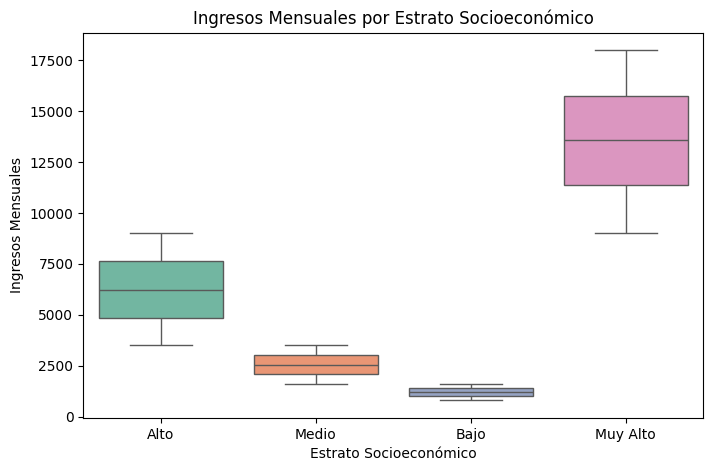

In [30]:
# Crea un lienzo para el gráfico y establece su tamaño en 8x5 pulgadas.
plt.figure(figsize=(8,5))

# Genera el diagrama de caja.
# - data=df_res: Usa el DataFrame df_res.
# - x='estrato_socioeconomico': El eje X muestra los diferentes estratos.
# - y='ingresos_mensuales': El eje Y muestra la distribución de los ingresos.
# - palette='Set2': Aplica un esquema de colores predefinido.
sns.boxplot(data=df_res, 
            x='estrato_socioeconomico', 
            y='ingresos_mensuales', 
            hue='estrato_socioeconomico', # Asignamos la misma variable a 'hue'
            palette='Set2',
            legend=False) # Añadimos 'legend=False'

# Añade un título descriptivo al gráfico.
plt.title('Ingresos Mensuales por Estrato Socioeconómico')

# Etiqueta el eje X.
plt.xlabel('Estrato Socioeconómico')

# Etiqueta el eje Y.
plt.ylabel('Ingresos Mensuales')

# Muestra el gráfico en la pantalla.
plt.show()

También generamos un **gráfico de barras** para visualizar la distribución de las preferencias alimenticias entre los usuarios. Este gráfico facilita la identificación de las opciones más populares, así como la detección de posibles tendencias o segmentos de interés dentro de la base de datos, lo que ayuda a enfocar los análisis y estrategias futuras.


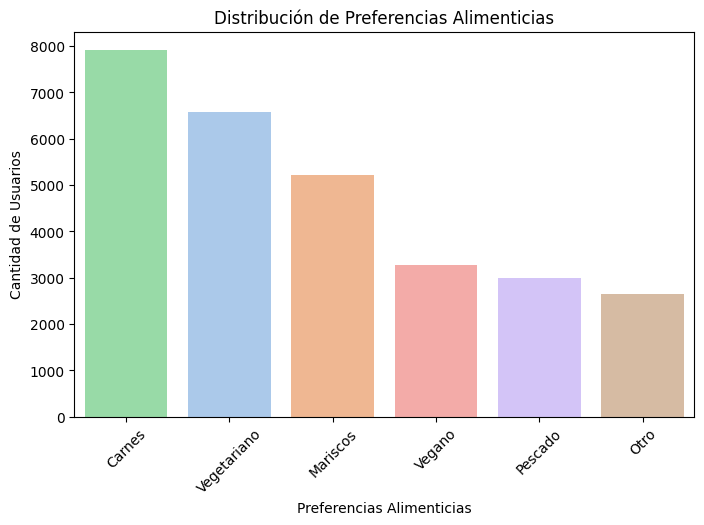

In [32]:
# Crea un lienzo para el gráfico y establece su tamaño en 8x5 pulgadas.
plt.figure(figsize=(8,5))

# Genera el diagrama de barras.
# - data=df_res: Usa el DataFrame df_res.
# - x='preferencias_alimenticias': Las preferencias se mostrarán en el eje X.
# - order=...: Ordena las barras según el conteo de cada preferencia, de mayor a menor.
# - palette='pastel': Aplica un esquema de colores suave y claro.
sns.countplot(data=df_res, 
              x='preferencias_alimenticias', 
              order=df_res['preferencias_alimenticias'].value_counts().index, 
              hue='preferencias_alimenticias',  # Asignamos la misma variable a 'hue'
              palette='pastel',
              legend=False) # Añadimos 'legend=False'
# Añade un título al gráfico.
plt.title('Distribución de Preferencias Alimenticias')

# Etiqueta el eje X.
plt.xlabel('Preferencias Alimenticias')

# Etiqueta el eje Y.
plt.ylabel('Cantidad de Usuarios')

# Rota las etiquetas del eje X 45 grados para una mejor legibilidad.
plt.xticks(rotation=45)

# Muestra el gráfico en la pantalla.
plt.show()

También generamos un **gráfico de barras** para visualizar la distribución de las preferencias alimenticias entre los usuarios. Este gráfico permite identificar las opciones más populares y detectar posibles tendencias o segmentos de interés dentro de la base de datos. Además, al analizar la distribución por ciudad, podemos observar si existen diferencias significativas en las preferencias alimenticias entre los usuarios de distintas localidades, lo que proporciona información valiosa para diseñar estrategias de marketing segmentadas y personalizadas.


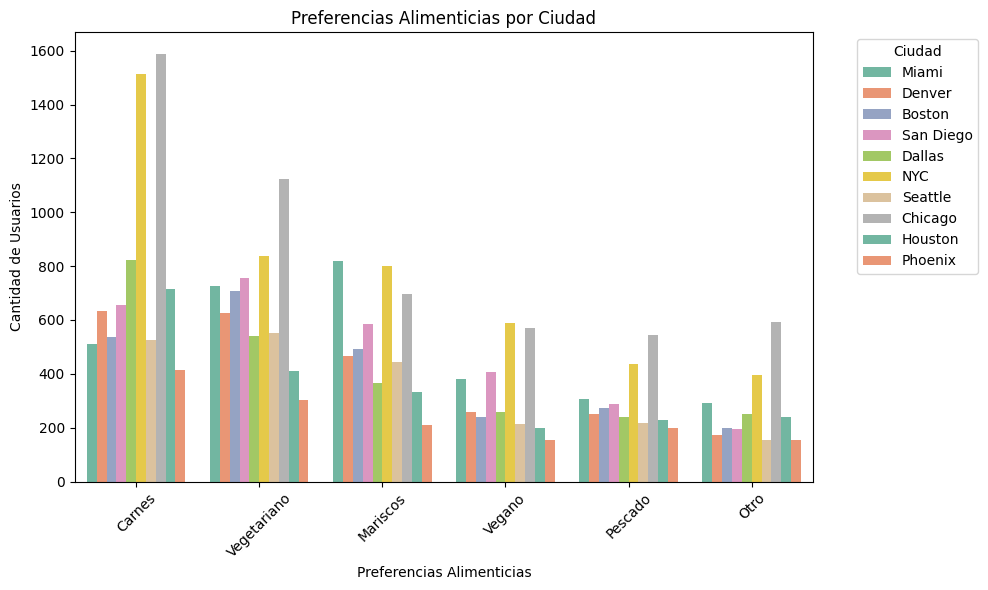

In [33]:
# Establece el tamaño de la figura (gráfico) para una visualización clara.
# El primer valor (10) es el ancho y el segundo (6) es la altura, en pulgadas.
plt.figure(figsize=(10,6))

# Crea el gráfico de barras agrupado con Seaborn.
# - 'data=df_res': Especifica el DataFrame a usar.
# - 'x='preferencias_alimenticias'': Asigna las preferencias de comida al eje horizontal.
# - 'hue='ciudad_residencia'': Agrupa las barras por ciudad. Cada ciudad tendrá un color diferente.
# - 'order=df_res['preferencias_alimenticias'].value_counts().index': Ordena las barras en el eje X de forma descendente,
#   mostrando primero las preferencias más populares en general.
# - 'palette='Set2'': Usa una paleta de colores predefinida de Seaborn, que es visualmente atractiva.
sns.countplot(data=df_res, x='preferencias_alimenticias', hue='ciudad_residencia', order=df_res['preferencias_alimenticias'].value_counts().index, palette='Set2')

# Agrega un título descriptivo al gráfico para que el lector entienda de qué trata.
plt.title('Preferencias Alimenticias por Ciudad')

# Etiqueta el eje X. 'rotation=45' gira las etiquetas para evitar que se superpongan si son largas.
plt.xlabel('Preferencias Alimenticias')

# Etiqueta el eje Y para indicar qué representa la altura de las barras.
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)

# Personaliza la leyenda para que sea más clara.
# 'title' cambia el título de la leyenda.
# 'bbox_to_anchor' y 'loc' colocan la leyenda fuera del gráfico para que no tape las barras.
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajusta automáticamente los parámetros del gráfico para que todo el contenido (títulos, etiquetas, leyenda)
# quepa bien en la figura sin ser cortado.
plt.tight_layout()

# Muestra el gráfico en la pantalla.
plt.show()

---

## Guardado de DataFrames Limpiados y Normalizados

Después de generar varias visualizaciones para detectar tendencias y patrones útiles para análisis futuros, procedemos a guardar los DataFrames resultantes, ya limpios y normalizados. Esta práctica garantiza que la información esté preparada para su reutilización en etapas posteriores del proyecto y facilita la continuidad del análisis de datos.

---


----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

#### Guardar el DataFrame general limpio en un archivo CSV

Para conservar una copia de los datos ya limpios y listos para análisis posteriores, se exporta el DataFrame a un archivo CSV. Se utiliza el parámetro `index=False` para evitar que se guarde la columna de índices.


In [35]:
# Guardar el DataFrame limpio en un nuevo archivo CSV

df_res.to_csv("usuarios_limpios.csv", index=False) # Guardar sin el índice original 

#### Segmentación de los datos por ciudad

Para enfocar el análisis únicamente en los usuarios de la ciudad de Chicago, como se había planteado desde el inicio, se filtra el DataFrame conservando solo los registros donde la columna `ciudad_residencia` es igual a `'Chicago'`

In [ ]:
# Segmentar los datos por la ciudad 'Chicago'

df_res = df_res[df_res['ciudad_residencia'] == 'Chicago']
df_res

,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
15,3456521319,Richard Adams,61,Masculino,Chicago,Medio,2,23.02,Sí,Sí,Vegetariano,No,(394)853-1965,No_aplica,Efectivo,2838.0
21,2916502228,Leah Cooper,44,Femenino,Chicago,Bajo,3,5.07,No,Sí,Mariscos,No,No_aplica,No_aplica,App,1365.0
24,5736368501,Jennifer Richardson,54,Femenino,Chicago,Alto,5,34.35,No,Sí,Carnes,Sí,No_aplica,No_aplica,Tarjeta,7133.0
29,9718391309,Alyssa Bryant,70,Femenino,Chicago,Bajo,1,6.59,No,Sí,Vegetariano,No,5093254270,No_aplica,Tarjeta,1205.0
32,9148064715,Michael Cochran,79,Masculino,Chicago,Muy Alto,8,78.02,No,Sí,Pescado,Sí,No_aplica,No_aplica,App,17625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,8106906538,Brenda Brown,47,Femenino,Chicago,Alto,4,11.23,No,Sí,Mariscos,Sí,No_aplica,No_aplica,Tarjeta,4862.0
29970,3802822089,Angela Arroyo,52,Femenino,Chicago,Alto,6,10.19,Sí,Sí,Pescado,No,(305)695-1082x9692,No_aplica,Efectivo,5092.0
29982,3316277000,Elizabeth Pittman,69,Femenino,Chicago,Alto,6,27.17,No,Sí,Mariscos,No,001-271-741-4011x35675,ryanbeltran@example.org,Efectivo,3703.0
29998,8853079811,Tamara Griffin,77,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,No_aplica,Tarjeta,1057.0


#### Exportar el DataFrame segmentado a un archivo CSV

Para guardar únicamente los datos de los usuarios de Chicago ya limpios y segmentados, se exporta el DataFrame a un archivo CSV. Se utiliza `index=False` para no incluir la columna de índices en el archivo final.

In [ ]:
# Exportar el DataFrame limpio a un archivo CSV sin incluir el índice

df_res.to_csv('Datos_usuarios_Chicago_limpios.csv', index=False) # Exportar el DataFrame limpio a un archivo CSV sin incluir el índice

## Conclusiones 


----------
- [1. Carga de datos](#Carga-de-datos)
- [2. Limpieza de datos](#Limpieza-de-datos)
- [3. Visualizacion de relaciones](#visualizacion-de-relaciones-entre-variables-numericas-y-categoricas)
- [4. Guardado de DataFrames](#Guardado-de-dataframes-limpiados-y-normalizados)
- [5. Conclusiones](#conclusiones-del-proceso-de-exploracion-y-limpieza-de-datos)
-------------

---

### **Resumen del Trabajo Realizado**

En este primer hito del proyecto integrador, tomamos un dataset inicial de **30,000 registros y 17 columnas** y lo transformamos en una base de datos limpia, coherente y lista para análisis más profundos. El trabajo abarcó desde la exploración inicial hasta la corrección de inconsistencias, sentando las bases para futuras segmentaciones de clientes.

### **Principales Problemas Resueltos**

#### **1. Calidad de los Datos**
- **Valores fuera de rango**: Corregimos edades irrealistas (como valores negativos y mayores a 120 años), estableciendo un rango adecuado entre 18 y 120 años.
- **Datos negativos**: Se abordaron los valores negativos en la **frecuencia de visitas**, mediante un enfoque de imputación segmentado por ciudad y estrato socioeconómico.
- **Valores nulos**: Implementamos imputaciones adaptadas a cada contexto, usando la mediana para la edad, la media para los gastos y la moda para las preferencias alimenticias.

#### **2. Estructura y Consistencia**
- **Simplificación**: Unificamos el nombre y apellido en una sola columna, facilitando su manejo en futuras etapas.
- **Tipos de datos**: Establecimos tipos de datos coherentes (enteros para edad y frecuencia, flotantes para los ingresos).
- **Coherencia lógica**: Eliminamos registros inconsistentes, como aquellos con frecuencia de visitas igual a 0 y gasto en comida igual a 0.

#### **3. Selección Estratégica**
Elegimos **Chicago** como ciudad principal para los análisis, basándonos en dos criterios fundamentales:
- **Volumen de datos**: Mayor cantidad de registros que permitirán un análisis más representativo.
- **Calidad**: La menor proporción de valores nulos en variables clave, garantizando una mayor confiabilidad en los resultados.

### **Metodología Aplicada**

La estrategia de limpieza de datos siguió una serie de principios clave:

1. **Imputación inteligente**: Segmentación por ciudad y estrato socioeconómico, asegurando la coherencia de los datos.
2. **Preservación de relaciones**: Se cuidaron las correlaciones naturales entre variables como **frecuencia de visita** y **gasto en comida**.
3. **Documentación detallada**: Cada transformación fue debidamente justificada y registrada para garantizar transparencia y reproducibilidad.
4. **Automatización**: Utilizamos una función personalizada `imputar` para estandarizar todos los procesos.

### **Resultados Obtenidos**

El dataset final presenta:
- **Completitud**: Todos los valores nulos en variables clave fueron gestionados.
- **Consistencia**: Tipos de datos apropiados y valores dentro de rangos realistas.
- **Enfoque**: Datos de **Chicago** listos para ser segmentados y analizados.
- **Seguimiento**: Se generaron dos archivos de salida: `usuarios_limpios.csv` (completo) y `Datos_usuarios_Chicago_limpios.csv` (segmentado).

### **Valor para los próximos análisis**

Este trabajo aporta:

1. **Base sólida**: Datos de alta calidad que permitirán identificar patrones de comportamiento.
2. **Eficiencia**: Una estructura lista para aplicar modelos de segmentación.
3. **Confiabilidad**: Información precisa para decisiones informadas y estratégicas.
4. **Escalabilidad**: El dataset está listo para análisis comparativos y futuros estudios.

### **Próximos Pasos del Proyecto**

Lo siguiente será profundizar aún más en los datos, con estos pasos:
- **Análisis exploratorio avanzado** sobre correlaciones y tendencias en los datos de **Chicago**.
- **Recolección de datos de restaurantes** de Chicago para integrar a la base de usuarios.
- **Modelo de recomendación** que combine los datos de usuarios y restaurantes, sugiriendo establecimientos personalizados.
- **Estrategias de marketing** basadas en los patrones de consumo y las preferencias de los usuarios.

### **Lecciones Aprendidas**

Este proceso nos dejó varias lecciones importantes:
- La necesidad de un **análisis exploratorio exhaustivo** antes de cualquier transformación significativa.
- Tomar decisiones **metodológicas fundamentadas** en el contexto del negocio.
- Encontrar el **equilibrio entre completitud de datos y representatividad**.
- La **documentación clara y precisa** es esencial para garantizar la reproducibilidad.

### **Reflexión Final**

La limpieza de datos es mucho más que un paso técnico; es una actividad estratégica que define la calidad de todos los análisis posteriores. Este primer avance ha sentado una base sólida, lo que permitirá que, en las siguientes fases, podamos tomar decisiones informadas y precisas sobre la segmentación de clientes.

Con el dataset limpio de **Chicago**, tenemos ahora una base valiosa que se enriquecerá con análisis más profundos y recomendaciones personalizadas, optimizando las futuras campañas de marketing digital.

---

> **Nota**: Este primer avance establece las bases del proyecto integrador. Los **insights específicos**, patrones detallados y **recomendaciones accionables** se desarrollarán en los siguientes entregables, donde aplicaremos técnicas avanzadas sobre esta base de datos limpia y confiable.
